## 1. Import required libraries and read the data:

### Import the required libraries and read the dataset

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingClassifier
from mlxtend.regressor import StackingRegressor

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
# Import dataset
df = pd.read_csv("download-2.csv") #reading the provided dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
#Checking 1000 samples from the dataset
df.sample(1000)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7830,Counter Terrorist Gun Strike CS: Special Forces,GAME,4.2,211,44M,"10,000+",Free,0,Teen,Action,"August 18, 2017",1.1,2.3 and up
9794,ES Dark Theme for free,TOOLS,4.2,7851,364k,"1,000,000+",Free,0,Everyone,Tools,"August 22, 2017",2.0.7,4.0 and up
546,The League,DATING,3.0,837,9.4M,"100,000+",Free,0,Mature 17+,Dating,"July 16, 2018",1.15.0,4.4 and up
371,Google Duo - High Quality Video Calls,COMMUNICATION,4.6,2083237,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 31, 2018",37.1.206017801.DR37_RC14,4.4 and up
460,Mail1Click - Secure Mail,COMMUNICATION,4.1,255,1.6M,"10,000+",Free,0,Everyone,Communication,"April 11, 2017",2.3,2.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,SweetLand — Family Board Game,FAMILY,4.2,38,47M,"1,000+",Paid,$0.99,Everyone,Casual;Pretend Play,"November 14, 2014",1.2,2.3.3 and up
8151,CZ-38 (vz 38) pistol explained,BOOKS_AND_REFERENCE,NaN,0,13M,5+,Paid,$5.99,Everyone,Books & Reference,"August 10, 2017",Android 3.1 - 2017,1.6 and up
10512,Funny Jokes,FAMILY,3.9,2505,2.9M,"100,000+",Free,0,Mature 17+,Entertainment,"June 18, 2018",1.2,4.1 and up
2189,Avokiddo Emotions,FAMILY,4.6,73,12M,"1,000+",Paid,$2.99,Everyone,Education;Pretend Play,"May 21, 2018",1.7.0,4.0.3 and up


In [4]:
#Shape of the dataset
shape = df.shape
shape

(10841, 13)

In [5]:
#Size of the dataset
size = df.size
size

140933

In [6]:
#Lets check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- The dataset has 10841 entries and 13 columns
- Except Rating column, all other columns are of object type

## 2. Data cleansing and Exploratory data analysis:

#### Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [115]:
#Checking the statistical summary 
df.describe(include='all')

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
count,7418.000000,7418.000000,7.418000e+03,7.418000e+03,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000,7418.000000
mean,16.584929,72104.604206,2.276083e+07,7.830035e+06,0.073470,1.117168,1.466568,60.161499,595.835266,988.056889,14.320437,0.888919
std,8.138754,152782.166749,2.343921e+07,4.632233e+07,0.260924,17.715707,1.006800,32.012264,315.907571,718.122615,4.961023,0.314254
min,0.000000,1.000000,8.500000e+03,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,99.000000,5.100000e+06,1.000000e+04,0.000000,0.000000,1.000000,35.000000,362.000000,353.250000,12.000000,1.000000
50%,14.000000,2067.500000,1.400000e+07,1.000000e+05,0.000000,0.000000,1.000000,64.000000,604.000000,915.000000,14.000000,1.000000
75%,24.000000,36900.750000,3.300000e+07,1.000000e+06,0.000000,0.000000,1.000000,91.000000,802.000000,1566.750000,16.000000,1.000000
max,32.000000,473092.000000,1.000000e+08,1.000000e+09,1.000000,400.000000,5.000000,111.000000,1277.000000,2518.000000,30.000000,1.000000


- There are outliers in column Reviews, Installs, Price, Last Updated and Current Ver and it needs to be handled.

#### Check if there are any duplicate records in the dataset? if any drop them.

In [8]:
len(df[df.duplicated()]) #checking for any duplicate rows

483

In [9]:
df = df.drop_duplicates()

In [10]:
len(df[df.duplicated()]) #checking again for any duplicate rows after dropping them

0

There were 483 duplicate records. These are now successfully removed.

#### Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.

In [11]:
df['Category'].value_counts().index.tolist() #printing unique categories of column "Category"

['FAMILY',
 'GAME',
 'TOOLS',
 'BUSINESS',
 'MEDICAL',
 'PRODUCTIVITY',
 'PERSONALIZATION',
 'LIFESTYLE',
 'COMMUNICATION',
 'FINANCE',
 'SPORTS',
 'PHOTOGRAPHY',
 'HEALTH_AND_FITNESS',
 'SOCIAL',
 'NEWS_AND_MAGAZINES',
 'TRAVEL_AND_LOCAL',
 'BOOKS_AND_REFERENCE',
 'SHOPPING',
 'DATING',
 'VIDEO_PLAYERS',
 'MAPS_AND_NAVIGATION',
 'EDUCATION',
 'FOOD_AND_DRINK',
 'ENTERTAINMENT',
 'AUTO_AND_VEHICLES',
 'LIBRARIES_AND_DEMO',
 'WEATHER',
 'HOUSE_AND_HOME',
 'ART_AND_DESIGN',
 'EVENTS',
 'PARENTING',
 'COMICS',
 'BEAUTY',
 '1.9']

In [12]:
df = df[df['Category'] != '1.9']
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
df['Category'].value_counts().index.tolist() #to check if invalid columns are removed


['FAMILY',
 'GAME',
 'TOOLS',
 'BUSINESS',
 'MEDICAL',
 'PRODUCTIVITY',
 'PERSONALIZATION',
 'LIFESTYLE',
 'COMMUNICATION',
 'FINANCE',
 'SPORTS',
 'PHOTOGRAPHY',
 'HEALTH_AND_FITNESS',
 'SOCIAL',
 'NEWS_AND_MAGAZINES',
 'TRAVEL_AND_LOCAL',
 'BOOKS_AND_REFERENCE',
 'SHOPPING',
 'DATING',
 'VIDEO_PLAYERS',
 'MAPS_AND_NAVIGATION',
 'EDUCATION',
 'FOOD_AND_DRINK',
 'ENTERTAINMENT',
 'AUTO_AND_VEHICLES',
 'LIBRARIES_AND_DEMO',
 'WEATHER',
 'HOUSE_AND_HOME',
 'ART_AND_DESIGN',
 'EVENTS',
 'PARENTING',
 'COMICS',
 'BEAUTY']

'1.9' was an invalid category and so it is dropped

#### Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.

In [14]:
df['Rating'].isnull().sum() 

1465

In [15]:
df = df.dropna() #dropping the rows having null values in it
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
df['Rating'].isnull().sum() 

0

In [17]:
#user defined function to convert ratings to high and low categories. The ratings greater than 3.5 is high and rest all are low
def rating_convert(ht):
    if ht > 3.5:
        x = "High"
        return x
    else:
        x = "Low"
        return x

df['Rating_category'] = df['Rating'].apply(rating_convert)

In [18]:
df['Rating_category'] #displays new ratings under column 'Rating_category'df['NS'].value_counts().describe()

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8886, dtype: object

#### Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

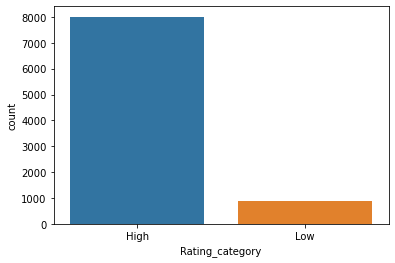

In [19]:
sns.countplot(x = 'Rating_category', data = df)

- The column 'Rating_category' is highly imbalanced
- Most of the data are present for high ratings as compared to low ratings

#### Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers using transformation approach.

In [20]:
df['Reviews'] = df['Reviews'].astype(int).round(2) #changing datatype of Reviews to int

In [21]:
df.info() #displays changed datatype of column "Reviews"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              8886 non-null   object 
 1   Category         8886 non-null   object 
 2   Rating           8886 non-null   float64
 3   Reviews          8886 non-null   int64  
 4   Size             8886 non-null   object 
 5   Installs         8886 non-null   object 
 6   Type             8886 non-null   object 
 7   Price            8886 non-null   object 
 8   Content Rating   8886 non-null   object 
 9   Genres           8886 non-null   object 
 10  Last Updated     8886 non-null   object 
 11  Current Ver      8886 non-null   object 
 12  Android Ver      8886 non-null   object 
 13  Rating_category  8886 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.3+ MB


In [22]:
df.describe()[['Reviews']]

,Reviews
count,8.886000e+03
mean,4.730928e+05
std,2.906007e+06
min,1.000000e+00
25%,1.640000e+02
50%,4.723000e+03
75%,7.131325e+04
max,7.815831e+07


- There are outliers in the column Reviews and it needs to be handled.

In [23]:
#User defined function to replace outliers using imputation as if they were missing values
def impute_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    upper = df[~(df>(q3+1.5*IQR))].max()

    lower = df[~(df<(q1-1.5*IQR))].min()

    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))

    return df

In [24]:
#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Reviews'] = impute_outliers_IQR(df['Reviews'])
#Changing the datatype of Reviews again to int since after imputing the datatype got changed to float
df['Reviews'] = df['Reviews'].astype(int)

In [25]:
df.describe()[['Reviews']]

,Reviews
count,8886.000000
mean,98404.319941
std,175581.140128
min,1.000000
25%,164.000000
50%,4723.000000
75%,71313.250000
max,473092.000000


#### The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype. (hint: Replace M with 1 million and K with 1 thousand, and drop/impute the entries where size='Varies with device').

In [26]:
def size(ht):
    ht = str(ht)
    x = ht[:-1]
    y = ht[-1]
    x1 = float(x)
    if (y == 'M') or (y == 'm'):
        s = x1*1000000
    elif (y == 'k') or (y == 'K'):
        s = x1*1000
    s = int(s)
    return s

In [27]:
df.drop(df[df['Size'] == 'Varies with device'].index, inplace = True)

In [28]:
df['Size'] = df['Size'].apply(size)

In [29]:
df['Size'].astype('int')

0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10833      619000
10834     2600000
10836    53000000
10837     3600000
10840    19000000
Name: Size, Length: 7418, dtype: int64

#### Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype.

In [30]:
# Replacing , in Installs
df['Installs'] = df['Installs'].str.replace(',','')
# Replacing + in Installs
df['Installs'] = df['Installs'].str.replace('+','')
#Changing datatype of column 'Installs' to int
df['Installs'] = df['Installs'].astype(int).round(2)

In [31]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7418, dtype: int64

In [120]:
#There are outliers in the Installs column and it needs to be handled

#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Installs'] = impute_outliers_IQR(df['Installs'])
#Changing the datatype of Installs again to int
df['Installs'] = df['Installs'].astype(int)

In [121]:
df.describe()[['Installs']]

,Installs
count,7.418000e+03
mean,6.374109e+05
std,7.685126e+05
min,1.000000e+00
25%,1.000000e+04
50%,1.000000e+05
75%,1.000000e+06
max,1.928598e+06


#### Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.

In [32]:
df['Price'].value_counts().index.tolist() #checking the original values present in column 'Price'

['0',
 '$0.99',
 '$2.99',
 '$4.99',
 '$1.99',
 '$3.99',
 '$1.49',
 '$2.49',
 '$9.99',
 '$5.99',
 '$399.99',
 '$6.99',
 '$14.99',
 '$4.49',
 '$7.99',
 '$3.49',
 '$19.99',
 '$29.99',
 '$24.99',
 '$12.99',
 '$1.00',
 '$1.70',
 '$8.99',
 '$17.99',
 '$10.99',
 '$16.99',
 '$11.99',
 '$10.00',
 '$1.50',
 '$3.04',
 '$1.75',
 '$14.00',
 '$2.00',
 '$3.08',
 '$2.59',
 '$19.40',
 '$15.46',
 '$5.49',
 '$4.29',
 '$13.99',
 '$389.99',
 '$3.28',
 '$4.60',
 '$9.00',
 '$2.90',
 '$1.97',
 '$2.56',
 '$8.49',
 '$37.99',
 '$18.99',
 '$1.76',
 '$33.99',
 '$39.99',
 '$7.49',
 '$79.99',
 '$3.88',
 '$400.00',
 '$3.02',
 '$4.84',
 '$15.99',
 '$4.77',
 '$1.61',
 '$1.59',
 '$6.49',
 '$1.29',
 '$299.99',
 '$379.99',
 '$1.20']

In [33]:
# Replacing $ in Installs
df['Price'] = df['Price'].str.replace('$','')
#Changing datatype of column 'Price' to float
df['Price'] = df['Price'].astype(float).round(2)

In [124]:
df['Price'].sample(500)

2121    0
1674    0
9034    0
1161    0
4458    1
       ..
4167    0
510     0
4236    0
384     0
497     0
Name: Price, Length: 500, dtype: int64

In [122]:
#There are outliers in the Price column and it needs to be handled

#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Price'] = impute_outliers_IQR(df['Price'])
#Changing the datatype of Price again to int
df['Price'] = df['Price'].astype(int)

In [130]:
df.describe()[['Price']]

,Price
count,7418.000000
mean,0.073470
std,0.260924
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## 3. Data Preparation for model building:

#### Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) will use that as target.)

In [35]:
df = df.drop('Rating',axis=1)

In [36]:
df = df.drop('App',axis=1)

#### For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0.

In [37]:
# Replacing High as 1 in Rating_category
df['Rating_category'] = df['Rating_category'].str.replace('High','1')
# Replacing Low as 0 in Rating_category
df['Rating_category'] = df['Rating_category'].str.replace('Low','0')
#Changing datatype of column 'Rating_category' to int
df['Rating_category'] = df['Rating_category'].astype(int).round(2)

#### Encode the categorical columns

In [38]:
### Numerical Features in the dataset
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Rating_category'], dtype='object')

In [39]:
### Categorical features in the dataset
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [40]:
#user-defined function to encode two categorical values in the dataset.
def encode_twovalue(a):
    a =  a[a.columns].replace({'Free':0, 'Paid':1})
    return a

There are columns with only two categorical values , let's encode all binary Categorical columns

In [41]:
df = encode_twovalue(df)
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,ART_AND_DESIGN,159,19000000,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,ART_AND_DESIGN,967,14000000,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,ART_AND_DESIGN,87510,8700000,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,ART_AND_DESIGN,473092,25000000,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,ART_AND_DESIGN,967,2800000,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


#### Label Encoding all categorical columns with more than 2 values

In [42]:
#user-defined function to encode more than two categorical values in the dataset.
def encode_multiplevalue(a):
    le = LabelEncoder()
    a = a.astype(str)
    a=le.fit_transform(a)
    return a

In [43]:
df['Category'] = encode_multiplevalue(df['Category'])

In [44]:
df['Content Rating'] = encode_multiplevalue(df['Content Rating'])

In [45]:
df['Genres'] = encode_multiplevalue(df['Genres'])

In [46]:
df['Last Updated'] = encode_multiplevalue(df['Last Updated'])

In [47]:
df['Current Ver'] = encode_multiplevalue(df['Current Ver'])

In [48]:
df['Android Ver'] = encode_multiplevalue(df['Android Ver'])

In [49]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,0,159,19000000,10000,0,0.0,1,9,516,107,14,1
1,0,967,14000000,500000,0,0.0,1,11,441,926,14,1
2,0,87510,8700000,5000000,0,0.0,1,9,105,413,14,1
3,0,473092,25000000,50000000,0,0.0,4,9,764,2464,17,1
4,0,967,2800000,100000,0,0.0,1,10,698,246,19,1


In [127]:
#There are outliers in the Last Updated column and it needs to be handled

#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Last Updated'] = impute_outliers_IQR(df['Last Updated'])
#Changing the datatype of Last Updated again to int
df['Last Updated'] = df['Last Updated'].astype(int)

In [131]:
df.describe()[['Last Updated']]

,Last Updated
count,7418.000000
mean,595.835266
std,315.907571
min,0.000000
25%,362.000000
50%,604.000000
75%,802.000000
max,1277.000000


In [132]:
#There are outliers in the Current Ver column and it needs to be handled

#Imputing outliers as if they were missing values using the user defined function 'impute_outliers_IQR'
df['Current Ver'] = impute_outliers_IQR(df['Current Ver'])
#Changing the datatype of Last Updated again to int
df['Current Ver'] = df['Current Ver'].astype(int)

In [133]:
df.describe()[['Current Ver']]

,Current Ver
count,7418.000000
mean,988.056889
std,718.122615
min,0.000000
25%,353.250000
50%,915.000000
75%,1566.750000
max,2518.000000


#### Segregate the target and independent features.

In [134]:
df1 = df.copy() #taking a copy of the dataframe
df1

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,0,159,19000000,10000,0,0,1,9,516,107,14,1
1,0,967,14000000,500000,0,0,1,11,441,926,14,1
2,0,87510,8700000,1928598,0,0,1,9,105,413,14,1
3,0,473092,25000000,1928598,0,0,4,9,764,2464,17,1
4,0,967,2800000,100000,0,0,1,10,698,246,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10833,3,44,619000,1000,0,0,1,18,823,76,6,1
10834,11,7,2600000,500,0,0,1,36,686,107,16,1
10836,11,38,53000000,5000,0,0,1,36,593,578,16,1
10837,11,4,3600000,100,0,0,1,36,639,103,16,1


In [135]:
# separate independent variables in the X variable
X = df1.drop('Rating_category',axis=1)
# separate target column (i.e. Rating_category) in the Y variable
Y = df1['Rating_category']

#### Split the dataset into train and test.

In [136]:
## Split the data into two parts (i.e. 70% train and 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

#### Standardize the data, so that the values are within a particular range.

In [137]:
## Scaling the data using standard scalar
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5192, 11) (2226, 11)
(5192,) (2226,)


# 4. Model training, and testing:

#### Write a function to fit and print the model predictions, input parameters would be model, train, and test data.

In [138]:
#user-defined function to fit and print model predictions
def model_predict(model,X_train,y_train,X_test,y_test):
    dt = model
    dt.fit(X_train,y_train)
    y_test_pred = dt.predict(X_test)
    y_train_pred = dt.predict(X_train)
    
    print("Train R2_score",r2_score(y_train,y_train_pred))
    print("Test R2_score",r2_score(y_test,y_test_pred))

#### Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models and make predictions on test data and evaluate the models.

In [139]:
#Decision Tree
model_predict(DecisionTreeRegressor(),X_train,Y_train,X_test,Y_test)

Train R2_score 1.0
Test R2_score -0.7491025789482391


- Here negative test R2 score shows that the model does not follow the trend of the data. Lets try to prune it to get better results.

In [140]:
# Train multiple Decision tree models with different values for max_depth and max_features

max_depth = [3,5,7]
max_features = [3,5,7]
for i in max_depth:
    for j in max_features:
        dt = DecisionTreeRegressor(max_depth = i, max_features=j)
        dt.fit(X_train,Y_train)
        y_test_pred = dt.predict(X_test)
        y_train_pred = dt.predict(X_train)
        print(f"Train R2_score with max_depth = {i}, max_feature = {j}",r2_score(Y_train,y_train_pred))
        print(f"Test R2_score with max_depth = {i}, max_feature = {j}",r2_score(Y_test,y_test_pred))
        print("-"*20)

Train R2_score with max_depth = 3, max_feature = 3 0.05050267077186399
Test R2_score with max_depth = 3, max_feature = 3 0.04888610384059122
--------------------
Train R2_score with max_depth = 3, max_feature = 5 0.05920941871783125
Test R2_score with max_depth = 3, max_feature = 5 0.05437587455746251
--------------------
Train R2_score with max_depth = 3, max_feature = 7 0.05901076948399486
Test R2_score with max_depth = 3, max_feature = 7 0.05480347522393869
--------------------
Train R2_score with max_depth = 5, max_feature = 3 0.08727813967229403
Test R2_score with max_depth = 5, max_feature = 3 -0.008788187727946761
--------------------
Train R2_score with max_depth = 5, max_feature = 5 0.10438509917107897
Test R2_score with max_depth = 5, max_feature = 5 0.019874658030098247
--------------------
Train R2_score with max_depth = 5, max_feature = 7 0.10139681254020028
Test R2_score with max_depth = 5, max_feature = 7 0.039148524743699675
--------------------
Train R2_score with max_

- We can see we are getting the best R2_score using max_depth = 3 and max_feature = 7

In [141]:
#Check the importance of features as per the Decision Tree
dt = DecisionTreeRegressor(max_depth = 3, max_features = 7)
dt.fit(X_train,Y_train)
pd.Series(dt.feature_importances_, index = X_train.columns)

Category          0.104627
Reviews           0.769903
Size              0.119846
Installs          0.005624
Type              0.000000
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000000
Android Ver       0.000000
dtype: float64

- Category and Reviews were found as the best features

In [142]:
#Random Forest
model_predict(RandomForestRegressor(),X_train,Y_train,X_test,Y_test)

Train R2_score 0.8687772736788588
Test R2_score 0.06630602884981218


- This shows that the model is bit over-fitted. Lets try to prune it to get better results.

In [143]:
# Train multiple Random Forest models with different values for max_depth and max_features
max_depth = [3,4,5,6,7]
max_features = [3,4,5,6,7]
for i in max_depth:
    for j in max_features:
        rf = RandomForestRegressor(max_depth = i, max_features=j)
        rf.fit(X_train,Y_train)
        y_test_pred = rf.predict(X_test)
        y_train_pred = rf.predict(X_train)
        print(f"Train R2_score with max_depth = {i}, max_feature = {j}",r2_score(Y_train,y_train_pred))
        print(f"Test R2_score with max_depth = {i}, max_feature = {j}",r2_score(Y_test,y_test_pred))
        print("-"*20)

Train R2_score with max_depth = 3, max_feature = 3 0.07024430902695988
Test R2_score with max_depth = 3, max_feature = 3 0.059628582279470765
--------------------
Train R2_score with max_depth = 3, max_feature = 4 0.07488094995866956
Test R2_score with max_depth = 3, max_feature = 4 0.061852613448440286
--------------------
Train R2_score with max_depth = 3, max_feature = 5 0.07624558584647512
Test R2_score with max_depth = 3, max_feature = 5 0.06436061379368474
--------------------
Train R2_score with max_depth = 3, max_feature = 6 0.07826429719625527
Test R2_score with max_depth = 3, max_feature = 6 0.06642118576958334
--------------------
Train R2_score with max_depth = 3, max_feature = 7 0.07948300295869681
Test R2_score with max_depth = 3, max_feature = 7 0.06643970621476258
--------------------
Train R2_score with max_depth = 4, max_feature = 3 0.09096888145929327
Test R2_score with max_depth = 4, max_feature = 3 0.06595845382739363
--------------------
Train R2_score with max_de

- Pruning does not give better results than before. In fact it gives a high variance error which shows that the model is over-fitted

In [144]:
#Bagging
model_predict(BaggingClassifier(),X_train,Y_train,X_test,Y_test)

Train R2_score 0.943712055507372
Test R2_score -0.31642983573472727


- This also shows that the model is over-fitted. Also, the negative test R2 score shows that the model does not follow the trend of the data

In [145]:
#Boosting
model_predict(AdaBoostRegressor(base_estimator=dt, random_state=7, learning_rate=0.1),X_train,Y_train,X_test,Y_test)

Train R2_score -0.015101025508637012
Test R2_score -0.031453749612366355


- Using Boosting, it did not improve the accuracy instead it decreased the training accuracy

In [146]:
#Stacked Classifier models
model_predict(StackingRegressor(regressors=[LinearRegression(),DecisionTreeRegressor(max_depth=8),AdaBoostRegressor(n_estimators=100, random_state=0)],meta_regressor = RandomForestRegressor(n_estimators=100)),X_train,Y_train,X_test,Y_test)


Train R2_score 0.8511168340461166
Test R2_score -0.27478922681179796


- This model also seems to be overfitted

# 5. Conclusion and improvisation:

#### Compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

- This dataset seems to be prone to overfit. But it performed comparatively well on the Random Forest model.
- In future, we need to try different sets of parameters with the model to achieve better performance.